José Manuel Ramírez Araiza. 28/09/2023

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

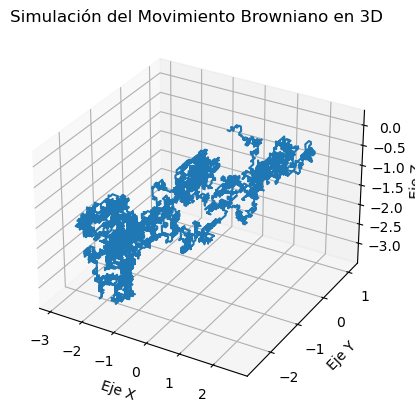

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

total_tiempo=10
delta_t=0.001 
num_puntos=int(total_tiempo/delta_t)

# coordenadas en cero
x=np.zeros(num_puntos)
y=np.zeros(num_puntos)
z=np.zeros(num_puntos)

for i in range(1,num_puntos):
    dx, dy, dz=np.random.choice([-1, 1], 3)
    
    x[i]=x[i-1]+dx*np.sqrt(delta_t)
    y[i]=y[i-1]+dy*np.sqrt(delta_t)
    z[i]=z[i-1]+dz*np.sqrt(delta_t)

# crear gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Simulación del Movimiento Browniano en 3D')
plt.show()


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

Número promedio de volados para quedar en quiebra: 26.18


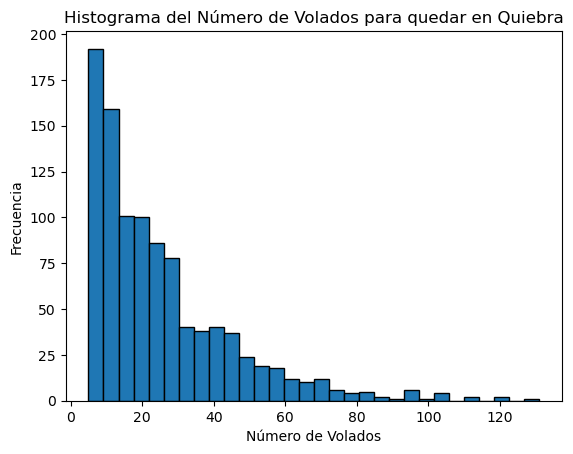

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def juega_volado(capital_inicial):
    capital=capital_inicial
    num_volados=0

    while capital > 0:
        apuesta=capital/2 if capital>=6 else 2
        resultado=np.random.randint(0, 2)
        if resultado==0:  # Ganó el volado
            capital += apuesta
        else:  # Perdió el volado
            capital -= apuesta
        num_volados += 1
    return num_volados

def simulacion_montecarlo(num_jugadores,capital_inicial):
    num_volados_promedio=0

    for _ in range(num_jugadores):
        num_volados=juega_volado(capital_inicial)
        num_volados_promedio += num_volados

    num_volados_promedio /= num_jugadores
    return num_volados_promedio

num_jugadores=10000
capital_inicial=20
num_volados_promedio=simulacion_montecarlo(num_jugadores, capital_inicial)

print(f"Número promedio de volados para quedar en quiebra: {num_volados_promedio:.2f}")

# Histograma
num_simulaciones=1000
num_volados_por_simulacion=np.zeros(num_simulaciones)

for i in range(num_simulaciones):
    num_volados_por_simulacion[i]=juega_volado(capital_inicial)

plt.hist(num_volados_por_simulacion, bins=30, edgecolor='k')
plt.xlabel('Número de Volados')
plt.ylabel('Frecuencia')
plt.title('Histograma del Número de Volados para quedar en Quiebra')
plt.show()
